# Title: Analysis of Resting Blood Pressure (mm Hg) and Maximum Heart Rate (bpm) for Heart Disease Severity Classification

# Introduction

For my project proposal, I will be using a modified version of the UCI Heart Disease dataset, specifically focusing on the Cleveland database. The UCI Heart Disease dataset includes data from four sources: Cleveland, Hungary, Switzerland, and the VA Long Beach. The Cleveland database used to predict heart disease is chosen due to its sufficient number of observations. Heart disease is a major global health concern and responsible for a significant portion of deaths worldwide. Early detection and accurate classification of heart disease are vital for effective treatment. Additionally, the ability to predict the severity of heart disease can help healthcare professionals prioritize interventions and provide the ideal treatments to individual patients' needs. The Heart Disease Cleveland dataframe includes the variables: "trestbps" and "thalach", which I will be using to predict our variable of interest: "num". In this dataframe, "trestbps" refers to the "resting blood pressure (mm Hg)" on admission to the hospital, while "thalach" refers to "maximum heart rate achieved (beats per minute, bpm)", and "num" means the diagnosis of heart disease with a value of: 0 means no heart disease, 1-4 means the levels of heart disease[1]. I would classify levels of heart disease as 1 = Mild, 2 = Moderate, 3 = Severe 4 = Life threatening[2]. With these resources, I will be answering the question: Can we classify the extent of heart disease using resting blood pressure and maximum heart rate achieved?

[1]: Source from Piazza question @555

[2]: For the levels of heart disease, I refer to the document https://www.rigshospitalet.dk/afdelinger-og-klinikker/kraeft-og-organsygdomme/blodsygdomme/forskning/forsoegsbehandling/Documents/Lymfomer/Triangle/Triangle-SAE.pdf

# Preliminary exploratory data analysis:


1. Demonstrate that the dataset can be read from the web into R 
2. Clean and wrangle your data into a tidy format
3. Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
4. Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

# Methods:

The dataset would be loaded into my jupyter notebook using the function of read.table() in R so that I can easily manipulate and tidy the data. Also, the variables would be change from character to factor or integer or numeric according to the orginal dataset. The data analysis will utilize the "trestbps," "thalach," and "num" columns, which represent resting blood pressure (mm Hg), maximum heart rate achieved (bpm), and the diagnosis of heart disease, respectively. This analysis aims to understand how different maximum heart rates and resting blood pressure levels correlate with various diagnoses of heart disease. 

The prediction would be measured based on a classification model. Both predictor variables are quantitative for predicting the categorial class. The classification would be done with the application of k nearest neighbor algorithm as it does not require any specific shape assumption for the algorithm to perform well. I would split the dataset into training and testing sets. The optimal number of neighbors would be found by using the training dataset to train the k-NN model on the training data using different values of k to find the optimal number of neighbors. Additionally, I would evaluate the model performance using cross-validation to ensure it generalizes well to unseen data. Lastly, I would use the classifier, trained by the training set, to classify the heart disease diagnoses in the testing data. Then, I would perform a metrics from the predicted testing set to obtain the information of accuracy, precision, and recall of that classifier by analyzing the confusion matrix to understand the model's performance in predicting each class of heart disease.

To visualize the result, a scatter plot would be used with the standardized variables to make sure the classifier would not treat one of the variables more important than the other. Each type of heart disease diagnosis would be labeled with different colors for clear identification.

# Expected outcomes and significance:

# What do you expect to find?

I expect to find that the severe heart disease would be find in a patient with a higher resting blood pressure (trestbps) due to that elevated blood pressure is a common risk factor for cardiovascular diseases and a lower maximum heart rate achieved (thalach) because patients with significant heart disease often have a reduced ability to achieve high heart rates during physical activity due to compromised cardiac function.

# What impact could such findings have?

The impact of such findings can help us effectively to diagnose the urgency for patients to receive the ideal treatment for a certain heart disease diagnose. For example, patients identified as high-risk could receive more aggressive treatment and closer monitoring, while low-risk patients might benefit from lifestyle modifications and less intensive care.

# What future questions could this lead to?

The two variables we used could have some deviation. They can’t be 100% certain that the heart disease is the correct type. Future question would be is there any other physiological variables that could further enhance the accuracy of heart disease severity prediction models?.

# This step is to load the packages I need to use to tidy the dataset:

In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
options(repr.matrix.max.rows = 6) #limits output of dataframes to 6 rows

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

# Loading Data from the original source

In [2]:
# Read data here: 
cleveland_data <- read.table("data/heart_disease/processed.cleveland.data", sep = ",")

# Data Wrangling:

In [22]:
# First, assign the column names of each column based on the UCI Website:
# https://archive.ics.uci.edu/dataset/45/heart+disease
colnames(cleveland_data) <- c('age','sex','cp','trestbps','chol','fbs', 'restcg', 
                              'thalach','exang','oldpeak','slope','ca','thal','num')

# This second step is to mutate the variables so that all of the columns/variables have the correct type according to the wedsite that the original dataset comes from
cleveland_clean <- cleveland_data |> mutate(age = as.numeric(age), sex = as_factor(sex), cp = as_factor(cp),
                                            trestbps = as.numeric(trestbps), chol = as.numeric(chol), fbs = as_factor(fbs),
                                            restcg = as_factor(restcg), thalach = as.numeric(thalach), exang = as_factor(exang),
                                            oldpeak = as.numeric(oldpeak), slope = as.numeric(slope), ca = as.numeric(ca),
                                            thal = as_factor(thal), num = as.factor(num)) |>
# This third step is to change gender/sex into words (male and female) instead of numbers (1 and 0) to make the data more readable to readers using the functions of mutate
# and fct_recode
                                     mutate(sex = fct_recode(sex, "male" = "1", "female" = "0"),
# This fourth step is to change the level of heart disease representing by numbers to a more readable description of the heart disease diagnose using 
#the functions of mutate and fct_recode
                                            num = case_when(
                                                                num == "0" ~ "No heart disease",
                                                                    num %in% c("1", "2") ~ "Moderate",
                                                                    num %in% c("3", "4") ~ "Life threatening",
                                           )) |>
    mutate(num = as_factor(num)) |>
# This fifth step is to use the function drop_na() to remove rows containing missing (NA) values from a data frame.
                                                                 drop_na()
cleveland_clean

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `ca = as.numeric(ca)`.
Caused by warning:
! NAs introduced by coercion”


age,sex,cp,trestbps,chol,fbs,restcg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
63,male,1,145,233,1,2,150,0,2.3,3,0,6.0,No heart disease
67,male,4,160,286,0,2,108,1,1.5,2,3,3.0,Moderate
67,male,4,120,229,0,2,129,1,2.6,2,2,7.0,Moderate
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,male,4,144,193,1,0,141,0,3.4,2,2,7.0,Moderate
57,male,4,130,131,0,0,115,1,1.2,2,1,7.0,Life threatening
57,female,2,130,236,0,2,174,0,0.0,2,1,3.0,Moderate


# Splitting data

In [4]:
# Set.seed is used to initialize to make randomization reproducible to ensure that the same random values are produced each time you run the code.
set.seed(20)

# Select columns for easier data analysis: trestbps, thalach, num
cleveland_select <- cleveland_clean |> select(trestbps, thalach, num)

# Split the dataset into 75% of the original data into training set and the 25% into testing set
cleveland_split <- initial_split(cleveland_select, prop = 0.75, strata = num)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

cleveland_train

trestbps,thalach,num
<dbl>,<dbl>,<fct>
120,129,Mild
140,155,Mild
110,168,Mild
⋮,⋮,⋮
128,130,Serious
164,90,Serious
130,115,Serious


# Plotting out a scatter plot using our unscaled and unstandarized training data:

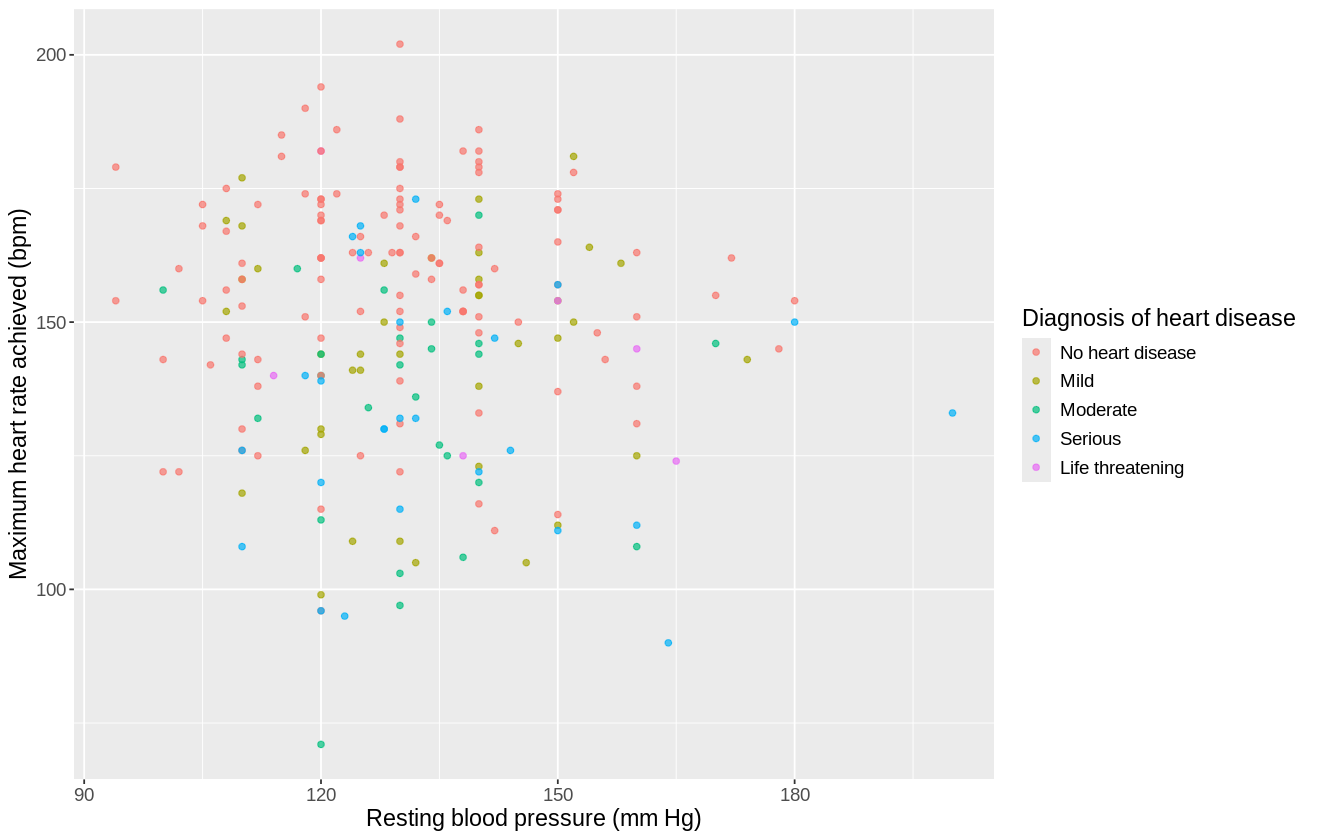

In [5]:
# This limits the width and height of the scatter plot
options(repr.plot.width = 11, repr.plot.height = 7)


cleveland_train_plot <- cleveland_train |>
                        ggplot(aes(x = trestbps , y = thalach , color = num)) +
                        geom_point(alpha = 0.7) +
                        labs(x = "Resting blood pressure (mm Hg)",y = "Maximum heart rate achieved (bpm)", 
                             color = "Diagnosis of heart disease") +
                        theme(text = element_text(size = 14))

cleveland_train_plot

